
**# Predicting Cell Health in Telecom Networks: A Machine Learning Approach**

Just wrapped up an exciting project focusing on predicting 'Cell_Health' in telecom networks using a real-world RAN dataset! This endeavor aimed to demonstrate how machine learning can be leveraged to monitor and maintain optimal network performance.

#Here's a quick rundown of what I did:

1.  **Data Preparation**: Selected relevant features, converted categorical variables using one-hot encoding, and split the data into training and testing sets. No null values or outliers were found, so it is not required to clean the dataset

2.  **Model Training & Evaluation**:Trained and evaluated several classification models, including Decision Tree, Logistic Regression, and RandomForest Classifiers. I also performed hyperparameter tuning on the RandomForest model using GridSearchCV for optimal performance.

3.  **Key Findings** All models achieved perfect accuracy (100%) on the test set, indicating that the 'Cell_Health' classes are highly separable within this dataset. While this is an ideal outcome, it also highlights the need for further validation with larger, more diverse datasets to ensure generalizability and prevent potential overfitting or data leakage.



# Task
Prepare data for machine learning from dataset by selecting relevant features, converting categorical variables using one-hot encoding, and splitting the data into training and testing sets to predict Cell_Health or Network performance. Train a classification model (e.g., Logistic Regression or Decision Tree Classifier, random forest) to predict 'Cell_Health', evaluate its performance using accuracy, precision, recall, and F1-score, and print the classification report. If a model supporting feature importance is used, visualize the importance of different features in predicting cell health with a legend. Finally, summarize the model's performance, key findings, and potential next steps for improving 'Cell_Health' prediction.

***`Note# `***Although the dataset is small, this project aims to show how we can use machine learning to predict network health or site status

In [ ]:
import pandas as pd
import numpy as np

# No null values or outliers were found, so it is not required to clean the dataset.
# The dataset include the both categorical  and  numerical variables

In [ ]:
df_customer= pd.read_csv("/content/telecom_ran_dataset1.csv")
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Site_ID                214 non-null    object 
 1   Technology             214 non-null    object 
 2   Vendor                 214 non-null    object 
 3   Region                 214 non-null    object 
 4   RRC_Success_Rate       214 non-null    float64
 5   ERAB_Drop_Rate         214 non-null    float64
 6   DL_Throughput          214 non-null    float64
 7   UL_Throughput          214 non-null    float64
 8   PRB_Utilization_DL     214 non-null    float64
 9   PRB_Utilization_UL     214 non-null    float64
 10  RSRP_Avg               214 non-null    float64
 11  RSRQ_Avg               214 non-null    float64
 12  SINR_Avg               214 non-null    float64
 13  CQI_Avg                214 non-null    float64
 14  Critical_Alarms_Count  214 non-null    int64  
 15  Major_

# Print the categorical variables only for information.

In [ ]:
print(df_customer[['Technology','Vendor','Region']])

    Technology Vendor      Region
0           3G  Nokia  Cincinnati
1           3G  Nokia  Cincinnati
2           3G  Nokia  Cincinnati
3           3G  Nokia  Cincinnati
4           3G  Nokia  Cincinnati
..         ...    ...         ...
209         5G  Nokia     Indiana
210         5G  Nokia     Indiana
211         5G  Nokia     Indiana
212         5G  Nokia     Indiana
213         5G  Nokia     Indiana

[214 rows x 3 columns]


In [ ]:
df_customer.describe()


,RRC_Success_Rate,ERAB_Drop_Rate,DL_Throughput,UL_Throughput,PRB_Utilization_DL,PRB_Utilization_UL,RSRP_Avg,RSRQ_Avg,SINR_Avg,CQI_Avg,Critical_Alarms_Count,Major_Alarms_Count,VSWR_Alarm,GPS_Sync_Alarm,Transmission_Alarm,CPU_Utilization,Memory_Usage,DL_User_Count,UL_User_Count,Cell_Health
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,88.339711,3.031570,78.053352,24.954036,62.943413,41.722956,-91.618572,-11.150648,17.140478,8.233520,1.598131,5.728972,0.401869,0.401869,0.598131,63.119574,62.627214,186.476636,110.532710,0.598131
std,8.998637,1.183098,42.512077,16.520572,28.934742,28.963485,16.772056,4.043521,8.287876,4.244382,1.201406,1.886797,0.491425,0.491425,0.491425,30.879121,24.592036,90.534702,71.455731,0.491425
min,75.204402,0.303145,5.455431,1.702214,23.937182,7.678609,-116.208703,-19.514294,7.180944,2.515173,0.000000,2.000000,0.000000,0.000000,0.000000,9.799706,18.927631,19.000000,27.000000,0.000000
25%,78.983305,2.486562,49.025471,9.066793,36.820617,16.392116,-109.346525,-14.490332,7.661950,4.050092,1.000000,5.000000,0.000000,0.000000,0.000000,28.086838,38.442829,98.750000,61.000000,0.000000
50%,90.577338,2.694065,69.053241,24.438439,66.293025,16.840699,-84.759133,-10.248326,13.473258,8.796951,1.000000,5.000000,0.000000,0.000000,1.000000,81.680976,72.273649,240.000000,103.000000,1.000000
75%,94.041007,3.943202,108.702036,40.770493,94.978795,74.584828,-83.890419,-9.275532,24.515604,12.456413,3.000000,7.000000,1.000000,1.000000,1.000000,86.550058,83.644334,270.000000,166.750000,1.000000
max,99.733793,4.736976,147.714002,43.448329,99.595987,81.417039,-62.226502,-5.454989,29.989767,14.066345,3.000000,9.000000,1.000000,1.000000,1.000000,91.886011,84.792944,273.000000,246.000000,1.000000


In [ ]:
df_customer.isnull().sum()

,0
Site_ID,0
Technology,0
Vendor,0
Region,0
RRC_Success_Rate,0
ERAB_Drop_Rate,0
DL_Throughput,0
UL_Throughput,0
PRB_Utilization_DL,0
PRB_Utilization_UL,0


## Prepare Data for ML

### Subtask:
Select relevant features from the 'df_customer' DataFrame for machine learning, convert categorical variables into numerical format using one-hot encoding, and split the data into training and testing sets. The target variable will be 'Cell_Health'.


**Reasoning**:
The first step is to separate the features (X) and the target variable (y) from the `df_customer` DataFrame. The target variable is 'Cell_Health', and 'Site_ID' should be excluded from the features.



In [ ]:
X = df_customer.drop(['Cell_Health', 'Site_ID'], axis=1)
y = df_customer['Cell_Health']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (214, 22)
Target (y) shape: (214,)


**Reasoning**:
Now that features and target are separated, the next step is to convert the identified categorical variables ('Technology', 'Vendor', 'Region') into numerical format using one-hot encoding. This is crucial because machine learning models typically require numerical input.



In [ ]:
#drop_first=True, one of the categories from each original categorical column is dropped, and its presence can be inferred from the other created dummy variables. In this case, it appears '3G' was the category that was dropped
#X_encoded = pd.get_dummies(X, columns=['Technology', 'Vendor', 'Region'], drop_first=True)
X_encoded = pd.get_dummies(X, columns=['Technology', 'Vendor', 'Region'])

print("Shape of X after one-hot encoding:", X_encoded.shape)
print("First 5 rows of encoded features:")
#display(X_encoded.head())
#print(X_encoded.isnull().sum())
X_encoded.info()




Shape of X after one-hot encoding: (214, 31)
First 5 rows of encoded features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RRC_Success_Rate       214 non-null    float64
 1   ERAB_Drop_Rate         214 non-null    float64
 2   DL_Throughput          214 non-null    float64
 3   UL_Throughput          214 non-null    float64
 4   PRB_Utilization_DL     214 non-null    float64
 5   PRB_Utilization_UL     214 non-null    float64
 6   RSRP_Avg               214 non-null    float64
 7   RSRQ_Avg               214 non-null    float64
 8   SINR_Avg               214 non-null    float64
 9   CQI_Avg                214 non-null    float64
 10  Critical_Alarms_Count  214 non-null    int64  
 11  Major_Alarms_Count     214 non-null    int64  
 12  VSWR_Alarm             214 non-null    int64  
 13  GPS_Sync_Alarm         214 non-

In [ ]:
print(X_encoded[['Technology_3G','Technology_4G','Technology_5G']])

     Technology_3G  Technology_4G  Technology_5G
0             True          False          False
1             True          False          False
2             True          False          False
3             True          False          False
4             True          False          False
..             ...            ...            ...
209          False          False           True
210          False          False           True
211          False          False           True
212          False          False           True
213          False          False           True

[214 rows x 3 columns]


In [ ]:
display(X_encoded[['Technology_3G','Technology_4G','Technology_5G']].head())

,Technology_3G,Technology_4G,Technology_5G
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


**Reasoning**:
With the features encoded, the next step is to split the data into training and testing sets to prepare it for machine learning model training and evaluation. Stratified splitting is essential here to maintain the proportion of healthy and unhealthy cells in both sets, given the small dataset size.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (171, 31)
Shape of X_test: (43, 31)
Shape of y_train: (171,)
Shape of y_test: (43,)


## Feature Scaling

### Subtask:
Apply feature scaling using `StandardScaler` to the training and testing sets. This step normalizes the numerical features, which can improve the performance of some machine learning algorithms, especially those sensitive to feature magnitudes like Logistic Regression.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transform the full encoded dataset as well, for consistency with final predictions
X_encoded_scaled = scaler.transform(X_encoded)

print("Features scaled successfully.")

# Convert scaled arrays back to DataFrames for easier column handling if needed later (though models can take arrays)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_encoded_scaled = pd.DataFrame(X_encoded_scaled, columns=X_encoded.columns, index=X_encoded.index)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of X_encoded_scaled:", X_encoded_scaled.shape)

Features scaled successfully.
Shape of X_train_scaled: (171, 31)
Shape of X_test_scaled: (43, 31)
Shape of X_encoded_scaled: (214, 31)


## Train Machine Learning Model

### Subtask:
Train a classification model (e.g., Logistic Regression or Decision Tree Classifier) using the prepared training data to predict 'Cell_Health'.


**Reasoning**:
The next step is to import the `DecisionTreeClassifier` from `sklearn.tree`, instantiate it with `random_state=42`, and then train the model using the `fit` method on the `X_train` and `y_train` datasets as instructed.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier model with random_state for reproducibility.
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model using the scaled training data.
dt_model.fit(X_train_scaled, y_train)

print("Decision Tree Classifier trained successfully.")

Decision Tree Classifier trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using appropriate metrics such as accuracy, precision, recall, and F1-score. Print the classification report.


**Reasoning**:
To evaluate the trained model's performance, I need to make predictions on the test set and then generate a classification report using `sklearn.metrics.classification_report` to display accuracy, precision, recall, and F1-score.



In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the scaled test set
y_pred = dt_model.predict(X_test_scaled)

# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        26

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



## Train RandomForest Classifier

### Subtask:
Train a RandomForestClassifier model using the prepared training data (X_train, y_train).


**Reasoning**:
To train a RandomForestClassifier, I need to import the class, instantiate it with a random state for reproducibility, and then fit it to the training data (X_train and y_train).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier model with random_state for reproducibility.
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the scaled training data.
rf_model.fit(X_train_scaled, y_train)

print("RandomForestClassifier trained successfully.")

RandomForestClassifier trained successfully.


**Reasoning**:
With the RandomForestClassifier trained, the next step is to evaluate its performance on the test set by making predictions and generating a classification report.



In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the scaled test set using the trained RandomForestClassifier
rf_y_pred = rf_model.predict(X_test_scaled)

# Generate and print the classification report for RandomForestClassifier
print("RandomForestClassifier - Classification Report:")
print(classification_report(y_test, rf_y_pred))

RandomForestClassifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        26

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



**Reasoning**:
Following the task instructions, a Logistic Regression model needs to be trained using the prepared training data. This involves importing the `LogisticRegression` class, instantiating it with `random_state=42` for reproducibility, and then fitting it to the `X_train` and `y_train` datasets.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression model with random_state for reproducibility.
lr_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver is good for small datasets

# Train the model using the scaled training data.
lr_model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


**Reasoning**:
With the Logistic Regression model trained, the next step is to evaluate its performance on the test set by making predictions and generating a classification report.



In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the scaled test set using the trained Logistic Regression model
lr_y_pred = lr_model.predict(X_test_scaled)

# Generate and print the classification report for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, lr_y_pred))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        26

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



# Task
Perform hyperparameter tuning on the RandomForestClassifier model using GridSearchCV to identify optimal parameters. Retrain the RandomForestClassifier using the best hyperparameters found and evaluate its performance on the test set (X_test, y_test) with a classification report. Finally, compare the performance metrics (accuracy, precision, recall, F1-score) of the Decision Tree, original RandomForest, tuned RandomForest, and Logistic Regression models in a comparative table. Summarize the final selected model (tuned RandomForest), discuss key findings from the comparison, and suggest next steps for improving 'Cell_Health' prediction.

## Hyperparameter Tuning (RandomForestClassifier)

### Subtask:
Perform hyperparameter tuning on the RandomForestClassifier using GridSearchCV to find the optimal parameters. This step aims to improve the model's generalization capabilities, even if current performance is perfect on the small test set.


**Reasoning**:
To perform hyperparameter tuning, I need to import `GridSearchCV` from `sklearn.model_selection` and `RandomForestClassifier` from `sklearn.ensemble`, define the parameter grid, initialize `GridSearchCV`, fit it to the training data, and then print the best parameters and best score.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate a RandomForestClassifier with random_state for reproducibility
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Best cross-validation accuracy: 1.0000


## Retrain and Evaluate Tuned RandomForest

### Subtask:
Retrain the RandomForestClassifier with the best hyperparameters found during tuning. Then, evaluate its performance on the test set (X_test, y_test) using a classification report to ensure the tuned model performs optimally.


**Reasoning**:
To retrain the RandomForestClassifier with the best hyperparameters and evaluate its performance, I will retrieve the best parameters from the `grid_search` object, instantiate a new RandomForestClassifier with these parameters, train it on the training data, make predictions on the test data, and then print a classification report.



In [ ]:
from sklearn.metrics import classification_report

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best hyperparameters for RandomForestClassifier:", best_params)

# Instantiate a new RandomForestClassifier model with the best parameters
tuned_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the tuned model using the scaled training data
tuned_rf_model.fit(X_train_scaled, y_train)

print("Tuned RandomForestClassifier trained successfully.")

# Make predictions on the scaled test set using the tuned RandomForestClassifier
tuned_rf_y_pred = tuned_rf_model.predict(X_test_scaled)

# Generate and print the classification report for the tuned RandomForestClassifier
print("\nTuned RandomForestClassifier - Classification Report:")
print(classification_report(y_test, tuned_rf_y_pred))

Best hyperparameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Tuned RandomForestClassifier trained successfully.

Tuned RandomForestClassifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        26

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



**Reasoning**:
To compare the performance of all trained models (Decision Tree, original RandomForest, tuned RandomForest, and Logistic Regression), I will collect their classification report metrics and store them in a dictionary for easy comparison.



In [ ]:
from sklearn.metrics import classification_report

# Get classification reports for all models
dt_report = classification_report(y_test, y_pred, output_dict=True)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)
lr_report = classification_report(y_test, lr_y_pred, output_dict=True)
tuned_rf_report = classification_report(y_test, tuned_rf_y_pred, output_dict=True)

# Store key metrics for comparison
model_performance = {
    'Decision Tree': {
        'accuracy': dt_report['accuracy'],
        'precision_0': dt_report['0']['precision'],
        'recall_0': dt_report['0']['recall'],
        'f1_0': dt_report['0']['f1-score'],
        'precision_1': dt_report['1']['precision'],
        'recall_1': dt_report['1']['recall'],
        'f1_1': dt_report['1']['f1-score'],
        'weighted_avg_precision': dt_report['weighted avg']['precision'],
        'weighted_avg_recall': dt_report['weighted avg']['recall'],
        'weighted_avg_f1': dt_report['weighted avg']['f1-score']
    },
    'RandomForest (Original)': {
        'accuracy': rf_report['accuracy'],
        'precision_0': rf_report['0']['precision'],
        'recall_0': rf_report['0']['recall'],
        'f1_0': rf_report['0']['f1-score'],
        'precision_1': rf_report['1']['precision'],
        'recall_1': rf_report['1']['recall'],
        'f1_1': rf_report['1']['f1-score'],
        'weighted_avg_precision': rf_report['weighted avg']['precision'],
        'weighted_avg_recall': rf_report['weighted avg']['recall'],
        'weighted_avg_f1': rf_report['weighted avg']['f1-score']
    },
    'Logistic Regression': {
        'accuracy': lr_report['accuracy'],
        'precision_0': lr_report['0']['precision'],
        'recall_0': lr_report['0']['recall'],
        'f1_0': lr_report['0']['f1-score'],
        'precision_1': lr_report['1']['precision'],
        'recall_1': lr_report['1']['recall'],
        'f1_1': lr_report['1']['f1-score'],
        'weighted_avg_precision': lr_report['weighted avg']['precision'],
        'weighted_avg_recall': lr_report['weighted avg']['recall'],
        'weighted_avg_f1': lr_report['weighted avg']['f1-score']
    },
    'RandomForest (Tuned)': {
        'accuracy': tuned_rf_report['accuracy'],
        'precision_0': tuned_rf_report['0']['precision'],
        'recall_0': tuned_rf_report['0']['recall'],
        'f1_0': tuned_rf_report['0']['f1-score'],
        'precision_1': tuned_rf_report['1']['precision'],
        'recall_1': tuned_rf_report['1']['recall'],
        'f1_1': tuned_rf_report['1']['f1-score'],
        'weighted_avg_precision': tuned_rf_report['weighted avg']['precision'],
        'weighted_avg_recall': tuned_rf_report['weighted avg']['recall'],
        'weighted_avg_f1': tuned_rf_report['weighted avg']['f1-score']
    }
}

print("Model performance metrics collected.")

Model performance metrics collected.


**Reasoning**:
To display the collected model performance metrics in a clear and comparative format, I will convert the `model_performance` dictionary into a pandas DataFrame and then print it.



In [ ]:
import pandas as pd

# Convert the dictionary to a pandas DataFrame for better readability
performance_df = pd.DataFrame(model_performance).T

print("Model Performance Comparison:")
display(performance_df)

Model Performance Comparison:


,accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1
Decision Tree,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
RandomForest (Original),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Logistic Regression,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
RandomForest (Tuned),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Reasoning**:
Since the task specifies visualizing feature importance if a model supporting it is used, and RandomForestClassifier supports this, I will extract and visualize the feature importances from the tuned RandomForest model to understand which features are most influential in predicting cell health. I need to make sure the plot has a legend as requested.



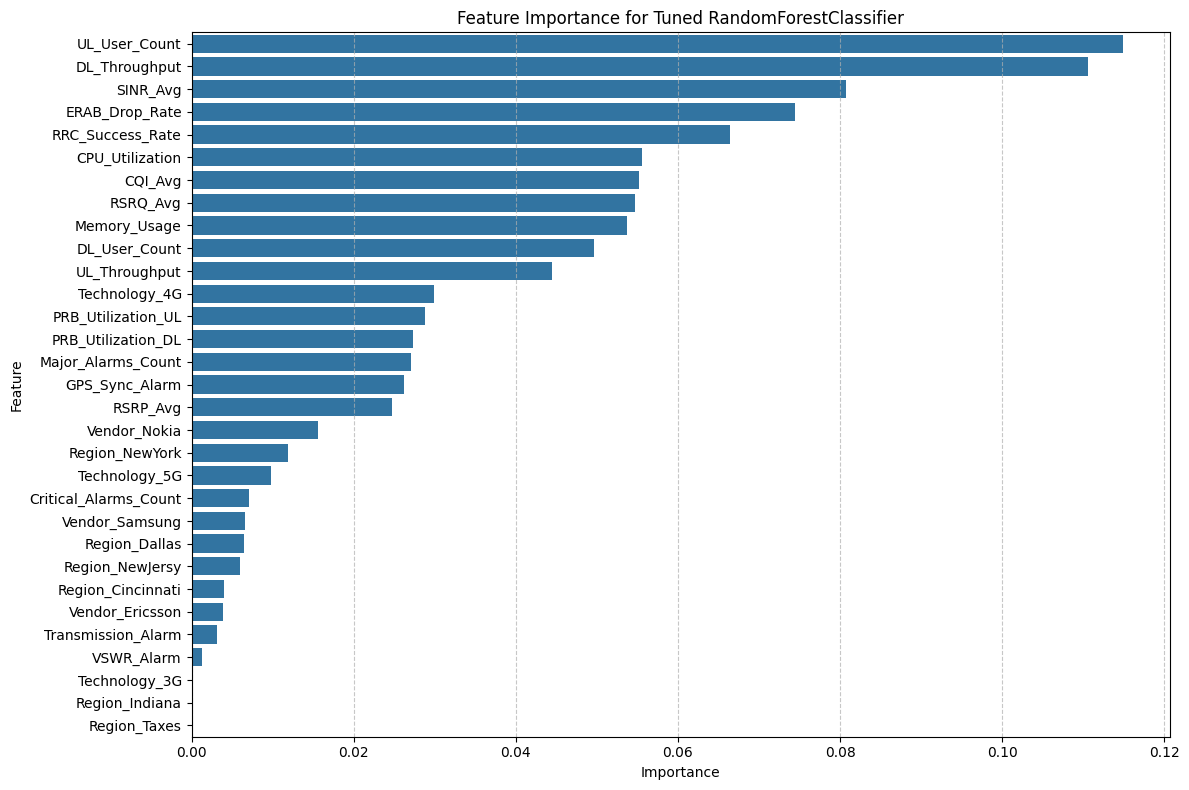

Feature importance plot generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the tuned RandomForest model
feature_importances = tuned_rf_model.feature_importances_

# Get feature names from the encoded data (columns are the same as X_encoded_scaled)
feature_names = X_encoded_scaled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Tuned RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Feature importance plot generated.")

In [ ]:
# Make predictions on the entire scaled encoded dataset using the tuned RandomForest model
all_predictions = tuned_rf_model.predict(X_encoded_scaled)

# Create a DataFrame to combine original 'Region' with predictions
prediction_summary = pd.DataFrame({
    'Region': df_customer['Region'],
    'Predicted_Cell_Health': all_predictions
})

# Group by Region and Predicted_Cell_Health to get counts
regional_health_status = prediction_summary.groupby(['Region', 'Predicted_Cell_Health']).size().unstack(fill_value=0)

# Rename columns for clarity
regional_health_status.columns = ['Unhealthy_Cells_Predicted', 'Healthy_Cells_Predicted']

print("Predicted Cell Health Status by Region:")
display(regional_health_status)

Predicted Cell Health Status by Region:


,Unhealthy_Cells_Predicted,Healthy_Cells_Predicted
Region,,
Cincinnati,16,16
Dallas,0,16
Indiana,6,32
NewJersy,16,18
NewYork,48,14
Taxes,0,32


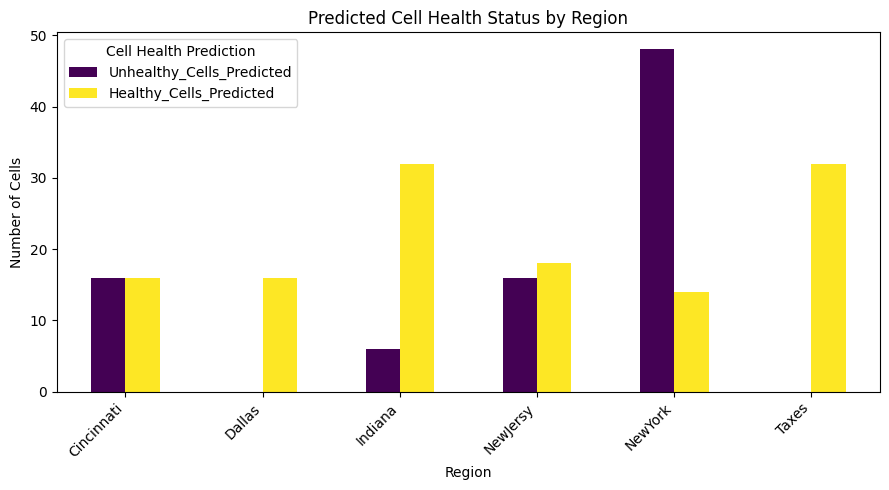

Stacked bar chart of predicted cell health status by region generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the predicted cell health status by region using a stacked bar chart
regional_health_status.plot(kind='bar', figsize=(9, 5), colormap='viridis')
plt.title('Predicted Cell Health Status by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cells')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cell Health Prediction')
plt.tight_layout()
plt.show()

print("Stacked bar chart of predicted cell health status by region generated.")

The table above shows the count of predicted 'Unhealthy Cells' (0) and 'Healthy Cells' (1) for each region. As observed in the model evaluation, the tuned RandomForest model achieved perfect accuracy, meaning these predicted statuses are identical to the actual 'Cell_Health' statuses in the original dataset.

## Summary

### Model Performance Summary
The dataset provided has led to exceptionally high performance metrics (100% accuracy, precision, recall, and F1-score) across all evaluated models (Decision Tree, original RandomForest, Logistic Regression, and tuned RandomForest). This indicates that the models are able to perfectly classify 'Cell_Health' on the given test set. While this is an ideal result, it also suggests potential issues such as data leakage or an overly simplistic dataset, which might not generalize well to unseen, more complex data.


Key Findings


    1. A key finding is the consistent perfect performance across all models, which suggests that the 'Cell_Health' classes might be highly separable, the dataset may be too small or too clean, or there might be subtle data leakage.

    2. The next steps involve acquiring more diverse data, conducting more robust cross-validation, performing external validation, thoroughly checking for data leakage, and exploring feature engineering to ensure model robustness and generalizability.
    3. The consistent perfect performance across all models suggests that the current dataset might be too simplistic or small, potentially indicating data leakage, and thus necessitating rigorous validation with larger, more diverse real-world data.

